PAP

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

from AA import DataDownloader, AssetAllocation, HierarchicalRiskParity, DynamicBacktester

In [2]:
downloader = DataDownloader()

assets = ['AAPL', 'IBM', 'TSLA', 'GOOG', 'NVDA'] 
benchmark = '^GSPC'  
start_date = '2019-01-01'
end_date = '2023-12-31'
rf = .065
ff_factors_expectations = {'Mkt-RF': 0.05, 'SMB': 0.02, 'HML': 0.03, 'RF': 0.02}

asset_prices, benchmark_prices, ff_factors = downloader.download_data(start_date=start_date, end_date=end_date,
                                                                      assets=assets, benchmark=benchmark)

# Default limits for every asset (min 1% - max 100%):  boounds = tuple((0.01, 1) for _ in range(self.num_assets))
Asset_allocation = AssetAllocation(asset_prices=asset_prices, benchmark_prices=benchmark_prices, rf=rf, 
                                   ff_factors=ff_factors, ff_factors_expectations=ff_factors_expectations) 

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Set Black-Litterman Expectations (Optional) 

P = np.array([
    [1, 0, 0, -1, 0],  
    [0, 1, -1, 0, 0],
    [0, 0, 0, 0, 1],
])

Q = np.array([0.05,  
              0.03,
              -0.15])  

Omega = np.diag([0.1**2, 0.15**2, 0.08**2])  # Incertidumbre en las vistas
tau = 0.08  # Incertidumbre en los rendimientos de equilibrio

Asset_allocation.set_blacklitterman_expectations(P, Q, tau, Omega)

In [4]:
Asset_allocation.Optimize_Portfolio(n_simulations = 10000) #Default Method == "Montecarlo"

,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.204783,0.012583,0.015015,0.481305,0.286313,1.268267
Max (Smart) Sharpe,0.053642,0.020079,0.021561,0.567289,0.337430,1.194980
Max Sharpe Famma French,0.264174,0.014080,0.023085,0.029235,0.669425,1.502916
Max Omega,0.345456,0.027497,0.296260,0.239472,0.091315,1.347569
Max (Smart) Omega,0.014411,0.016380,0.146691,0.178786,0.643731,1.203959
Min VaR (Empirical),0.023948,0.027847,0.012214,0.029651,0.906339,-0.056909
Min VaR (Parametric),0.177471,0.294582,0.504127,0.011392,0.012429,-0.024630
Semivariance,0.182247,0.203921,0.571132,0.016257,0.026442,0.000223
Safety-First,0.138142,0.017273,0.010897,0.590311,0.243377,0.079748
Max Sortino,0.073620,0.023478,0.028403,0.704414,0.170086,0.114971


In [5]:
print(Asset_allocation.Optimize_Portfolio(method = "SLSQP"))

                             AAPL      GOOG       IBM      NVDA      TSLA  \
Max Sharpe               0.212822  0.010000  0.010000  0.507455  0.259723   
Max (Smart) Sharpe       0.010000  0.010000  0.010000  0.569683  0.400317   
Max Sharpe Famma French  0.292493  0.010000  0.010000  0.010000  0.677507   
Max Omega                0.367592  0.018849  0.313470  0.213550  0.086539   
Max (Smart) Omega        0.010000  0.010000  0.201556  0.125309  0.653135   
Min VaR (Empirical)      0.010000  0.010000  0.010000  0.389209  0.580791   
Min VaR (Parametric)     0.156482  0.217159  0.606360  0.010000  0.010000   
Semivariance             0.200000  0.200000  0.200000  0.200000  0.200000   
Safety-First             0.221457  0.010000  0.010000  0.501681  0.256863   
Max Sortino              0.010000  0.010000  0.010000  0.747532  0.222468   
Risk Parity              0.200000  0.200000  0.200000  0.200000  0.200000   
Black-Litterman          0.250931  0.261034  0.296732  0.181303  0.010000   

In [6]:
Asset_allocation.Optimize_Portfolio(method = "Genetic", population_size=100, generations=200, crossover_rate=0.7, mutation_rate=0.1)

,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.268234,0.016931,0.050785,0.357692,0.306358,1.256113
Max (Smart) Sharpe,0.195499,0.015172,0.090295,0.460595,0.238439,1.262519
Max Sharpe Famma French,0.198651,0.132532,0.111776,0.066319,0.490721,1.424342
Max Omega,0.275314,0.073156,0.324991,0.221010,0.105530,1.344035
Max (Smart) Omega,0.062586,0.015525,0.128820,0.325813,0.467256,1.268262
Min VaR (Empirical),0.028974,0.013296,0.015603,0.147300,0.794827,-0.052728
Min VaR (Parametric),0.352219,0.024572,0.505326,0.051529,0.066354,-0.024920
Semivariance,0.595127,0.039603,0.182439,0.038396,0.144435,0.000350
Safety-First,0.314594,0.094145,0.021828,0.358521,0.210911,0.078220
Max Sortino,0.168627,0.030068,0.049036,0.384180,0.368089,0.111172


In [7]:
Asset_allocation.Optimize_Portfolio(method = "Gradient", learning_rate=0.01, max_iters=1000, tol=1e-6)

,AAPL,GOOG,IBM,NVDA,TSLA,Optimized Value
Max Sharpe,0.248382,0.009941,0.105160,0.386120,0.250397,1.258846
Max (Smart) Sharpe,0.169676,0.009953,0.079294,0.398525,0.342552,1.254627
Max Sharpe Famma French,0.362729,0.009972,0.009972,0.009972,0.607356,1.507943
Max Omega,0.343757,0.031730,0.318280,0.218590,0.087643,1.347934
Max (Smart) Omega,0.009988,0.009988,0.238967,0.176550,0.564507,1.238831
Min VaR (Empirical),0.199397,0.201444,0.199150,0.196247,0.203763,-0.035712
Min VaR (Parametric),0.255781,0.282329,0.441872,0.010009,0.010009,-0.022531
Semivariance,0.200001,0.200002,0.200005,0.199997,0.199995,0.000401
Safety-First,0.218456,0.079268,0.141724,0.316454,0.244097,0.077620
Max Sortino,0.231153,0.029324,0.061046,0.413851,0.264625,0.112007


[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

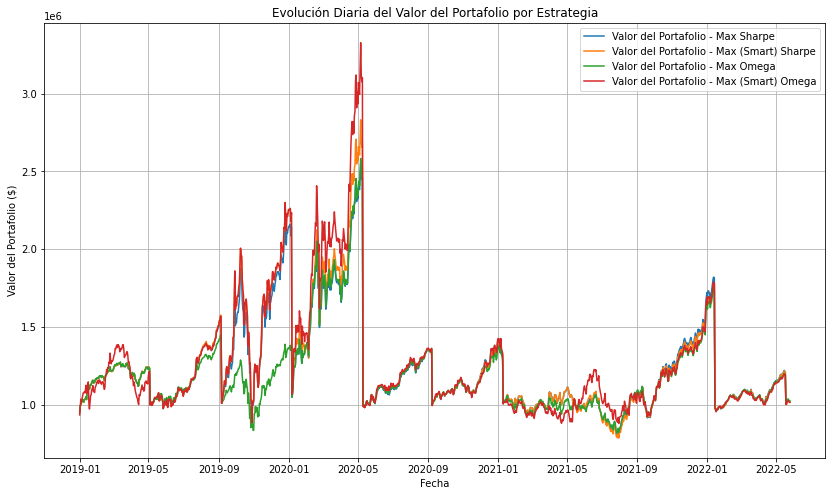

In [3]:
Backtest = DynamicBacktester(start_date, end_date, assets, benchmark, initial_capital=1_000_000,
                             strategies=["Max Sharpe", "Max (Smart) Sharpe", "Max Omega", "Max (Smart) Omega"],
                             rf=rf, ff_factors_expectations=ff_factors_expectations, method = 'SLSQP')

Backtest.run_backtest()

-----

-------

--------------

----------